# Data Analyst Capstone 

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All library imported')

All library imported


In [2]:
# import dataset
df=pd.read_excel('data.xlsx')
print('Data loaded')

Data loaded


In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


# Structure of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [6]:
# missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# drop the missing values
df.dropna(inplace=True)
print('Missing values dropped')

Missing values dropped


In [8]:
# missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.shape

(9541, 19)

In [10]:
# Check duplicate values
df.duplicated().sum()

0

# EDA 

In [12]:
df['Country Code'].value_counts()

1      8651
216     425
215      80
189      60
214      60
30       60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

In [11]:
# Identify Cities with Max & min number of rest.
df['City']

0        Jakarta
1        Jakarta
2        Jakarta
3        Jakarta
4        Jakarta
          ...   
9546    Dehradun
9547      Kanpur
9548      Kanpur
9549    Varanasi
9550    Varanasi
Name: City, Length: 9541, dtype: object

In [14]:
city_distribution=df['City'].value_counts() # sorted order

In [15]:
# print the names of city
max_city=city_distribution.idxmax()
min_city=city_distribution.idxmin()
print('City with Maximum no of rest. is',max_city)
print('City with min no of rest. is',min_city)

City with Maximum no of rest. is New Delhi
City with min no of rest. is Penola


In [16]:
# Find Rest with most national presence
fr_presence=df['Restaurant Name'].value_counts()
fr_presence

Cafe Coffee Day         83
Domino's Pizza          79
Subway                  63
Green Chick Chop        51
McDonald's              48
                        ..
Mudrika Food Factory     1
Kavita's Restaurant      1
Sam and Scrooge          1
Saheb's Restaurant       1
VNS Live Studio          1
Name: Restaurant Name, Length: 7436, dtype: int64

In [17]:
fr_city=fr_presence.idxmax()
print('Max Presence',fr_city)

Max Presence Cafe Coffee Day


In [18]:
# find out rest have table booking , ratio
df['Has Table booking']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Table booking, Length: 9541, dtype: object

In [19]:
df['Has Table booking'].value_counts()

No     8383
Yes    1158
Name: Has Table booking, dtype: int64

In [21]:
df['Has Table booking'].value_counts(normalize=True)*100

No     87.862907
Yes    12.137093
Name: Has Table booking, dtype: float64

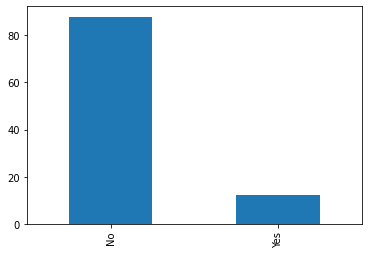

In [22]:
table_booking_ratio=df['Has Table booking'].value_counts(normalize=True)*100
table_booking_ratio.plot(kind='bar')
plt.show()

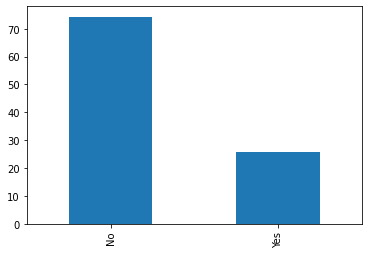

In [23]:
# providing online delivery, ratio
online_ratio=df['Has Online delivery'].value_counts(normalize=True)*100
online_ratio.plot(kind='bar')
plt.show()

In [24]:
online_ratio

No     74.310869
Yes    25.689131
Name: Has Online delivery, dtype: float64

In [27]:
# Compare votes those rest deliver online or not
delivery_votes=df.groupby('Has Online delivery')['Votes'].sum()
delivery_votes

Has Online delivery
No     977236
Yes    517914
Name: Votes, dtype: int64

In [29]:
delivery_votes=df.groupby('Has Online delivery')['Votes'].mean()
delivery_votes

Has Online delivery
No     137.833004
Yes    211.307222
Name: Votes, dtype: float64

In [30]:
vote_diff=delivery_votes['Yes']-delivery_votes['No']
vote_diff

73.47421731091595

In [31]:
# Find top 10 Cuisines
df['Cuisines']

0                                    Italian, Continental
1                              Asian, Indonesian, Western
2                                         Sushi, Japanese
3                                                Japanese
4                                         French, Western
                              ...                        
9546                     Chinese, North Indian, Fast Food
9547                         Indian, Chinese, Continental
9548    Cafe, Continental, Desserts, Ice Cream, Italia...
9549                                          Street Food
9550                                Chinese, North Indian
Name: Cuisines, Length: 9541, dtype: object

In [33]:
top_10_cuisines=df['Cuisines'].str.split(', ',expand=True).stack().value_counts()
top_10_cuisines.head(10)

North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
dtype: int64

In [38]:
# Rest wise number of cuisines
rest_cuisines=df['Cuisines'].str.split(', ').apply(lambda x:len(x))
rest_cuisines

0       2
1       3
2       2
3       1
4       2
       ..
9546    3
9547    3
9548    6
9549    1
9550    2
Name: Cuisines, Length: 9541, dtype: int64

In [39]:
type(rest_cuisines)

pandas.core.series.Series

In [40]:
max_cuisines_served=rest_cuisines.max()
min_cuisines_served=rest_cuisines.min()
print('Max number of cuisines served',max_cuisines_served)
print('Min number of cuisines served',min_cuisines_served)

Max number of cuisines served 8
Min number of cuisines served 1


In [42]:
# city wise most served rest
most_served_rest_city=df.groupby('City')['Cuisines'].apply(lambda x:x.str.split(', ').explode().value_counts().idxmax())
most_served_rest_city

City
Abu Dhabi                   Indian
Agra                  North Indian
Ahmedabad              Continental
Albany                       Steak
Allahabad             North Indian
                        ...       
Weirton                     Burger
Wellington City               Cafe
Winchester Bay              Burger
Yorkton                      Asian
€¡stanbul          Restaurant Cafe
Name: Cuisines, Length: 140, dtype: object

<AxesSubplot: >

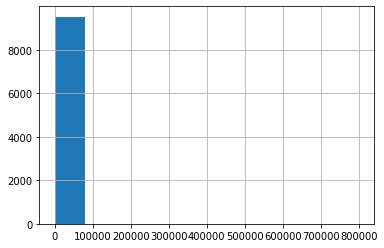

In [44]:
df['Average Cost for two'].hist()

<AxesSubplot: xlabel='Average Cost for two'>

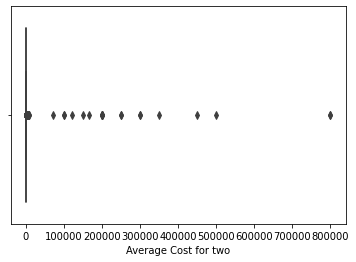

In [46]:
sns.boxplot(x=df['Average Cost for two'])

In [47]:
# Cost distribution
cost_distribution=df['Average Cost for two'].describe()
cost_distribution

count      9541.000000
mean       1200.368096
std       16129.588655
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

In [48]:
df['Average Cost for two']

0       4.1
1       4.6
2       4.9
3       4.2
4       4.3
       ... 
9546    4.3
9547    3.6
9548    3.9
9549    3.8
9550    3.5
Name: Aggregate rating, Length: 9541, dtype: float64

In [49]:
# Rating distribution 
rating_distribution=df.groupby('Aggregate rating').agg({'Price range':'mean','Votes':'mean',
                                                        'Average Cost for two':'mean'}).sort_index()

In [52]:
rating_distribution

,Price range,Votes,Average Cost for two
Aggregate rating,,,
0.0,1.235102,0.870112,340.337523
1.8,3.000000,322.000000,1000.000000
1.9,1.500000,106.000000,375.000000
2.0,2.000000,129.714286,892.857143
2.1,1.733333,76.400000,633.333333
2.2,1.777778,94.962963,599.074074
2.3,1.787234,69.808511,565.957447
2.4,1.885057,97.011494,670.919540
2.5,1.827273,79.672727,622.272727
